In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import sklearn as sk

In [5]:
import matplotlib.pyplot as plt

In [6]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [7]:
titanic = pd.read_csv("titanic.csv")


In [8]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [9]:
print (" no of passengers in orignal data:" +str(len(titanic.index)))

 no of passengers in orignal data:891


## analyzing the data

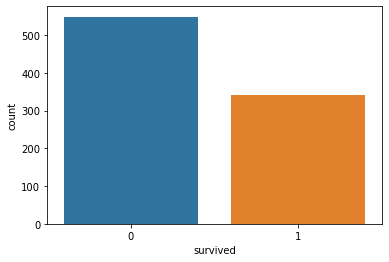

In [10]:
sns.countplot(x="survived",data=titanic)#people who have survived is represented by 1 

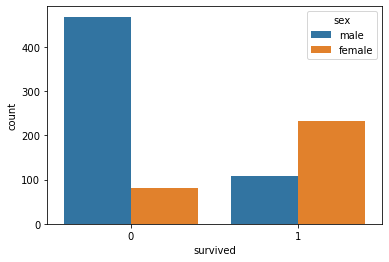

In [11]:
sns.countplot(x="survived", hue ="sex", data= titanic)

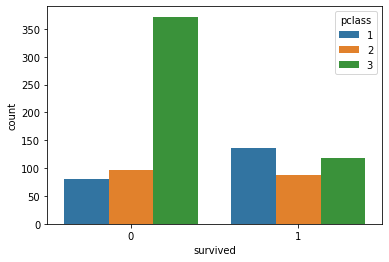

In [12]:
sns.countplot(x= "survived" ,hue = "pclass" , data= titanic)

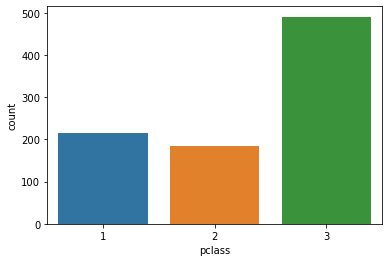

In [13]:
sns.countplot(x="pclass" , data= titanic)

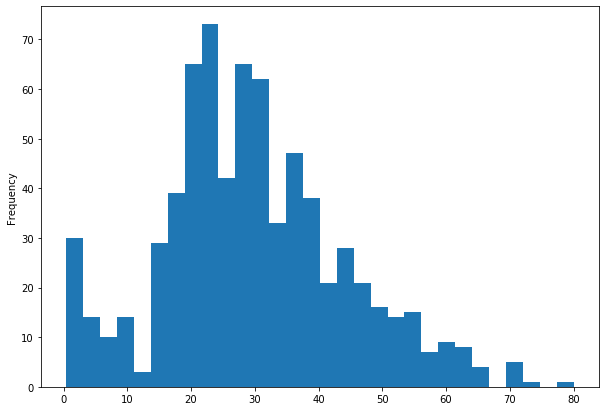

In [14]:
titanic["age"].plot.hist(bins=30 ,figsize=(10,7))

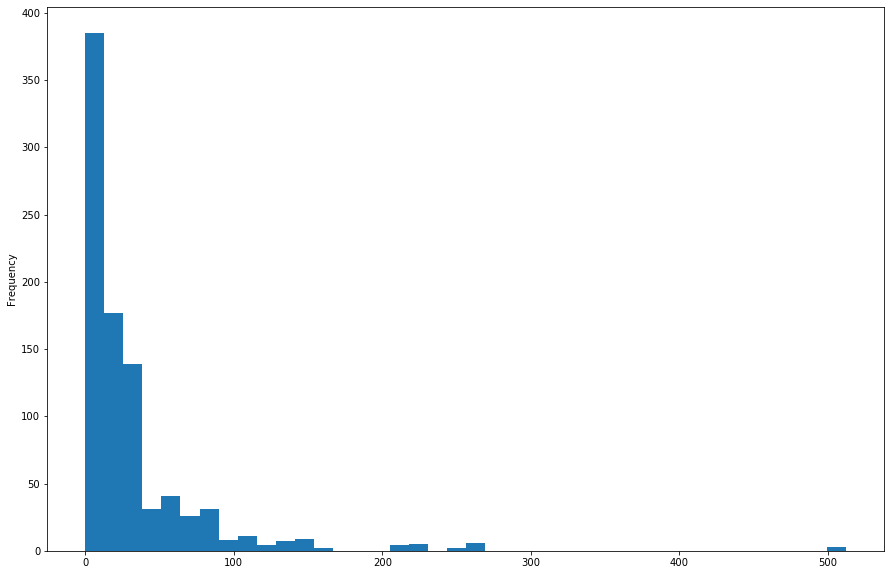

In [15]:
titanic["fare"].plot.hist(bins=40 ,figsize=(15,10))

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# data wrangling

In [17]:
dummy=pd.get_dummies(titanic['sex'],drop_first=True,prefix='sex')

In [18]:
dummy.isnull().sum()

sex_male    0
dtype: int64

In [19]:
dummy2=pd.get_dummies(titanic['embarked'],drop_first=True,prefix='embarked')

In [20]:
dummy2.isnull().sum()

embarked_Q    0
embarked_S    0
dtype: int64

In [21]:
titanic = pd.concat([titanic,dummy,dummy2],axis=1)


In [22]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,sex_male,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,C,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,1,0,1
5,0,3,male,NaN,0,0,8.4583,Q,NaN,1,1,0
6,0,1,male,54.0,0,0,51.8625,S,E,1,0,1
7,0,3,male,2.0,3,1,21.0750,S,NaN,1,0,1
8,1,3,female,27.0,0,2,11.1333,S,NaN,0,0,1
9,1,2,female,14.0,1,0,30.0708,C,NaN,0,0,0


In [23]:
titanic.drop(["deck","embarked","sex"],axis=1,inplace= True)

In [24]:
titanic.head(10)

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,NaN,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


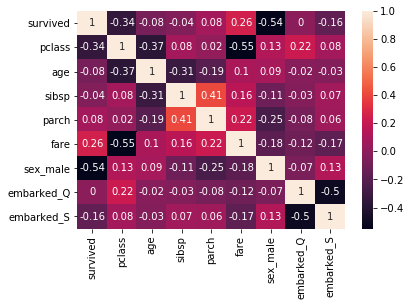

In [25]:
correlation_matrix = titanic.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [26]:
titanic.isnull().sum()

survived        0
pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

In [27]:
titanic =titanic.dropna()

In [28]:
titanic.isnull().sum()

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

## traning

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X= titanic.drop("survived",axis=1)

In [31]:
y= titanic["survived"]

In [32]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lgmodel=LogisticRegression()

In [36]:
lgmodel.fit(X_train,y_train)

c:\users\tyagi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
predict = lgmodel.predict(X_test)

In [38]:
predict

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,predict)

array([[111,  23],
       [ 27,  54]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,predict)

0.7674418604651163

In [43]:
from sklearn.metrics import classification_report

In [44]:
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.82       134\n           1       0.70      0.67      0.68        81\n\n    accuracy                           0.77       215\n   macro avg       0.75      0.75      0.75       215\nweighted avg       0.77      0.77      0.77       215\n'

In [45]:
predict= pd.DataFrame(predict)

In [46]:
titanic_with_pred=pd.concat([titanic,predict],axis=1)

In [47]:
titanic_with_pred.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,0
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0


In [48]:
titanic.head(10)

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0
10,1,3,4.0,1,1,16.7000,0,0,1


In [49]:
titanic.shape


(714, 9)